[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imeme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Introduction:
This project focuses on classifying SMS messages into two categories: spam and ham , using natural language processing and machine learning techniques. The workflow includes text preprocessing, feature extraction via TF-IDF, training three different models (Naive Bayes, Logistic Regression, SVM), and comparing their performance.


Dataset Description:
The dataset contains two columns: label (spam/ham) and message (text content). We preprocess the data by renaming columns and mapping labels to binary numeric values for modeling.


Data Cleaning Strategy:
- Convert to lowercase
- Remove numbers and punctuation
- Remove stopwords
- Tokenize and re-join words
This helps normalize text for improved model performance.


WordCloud and Distributions:
Visualizing the most frequent words in spam vs ham messages, as well as message length distributions, helps understand the data's linguistic characteristics.



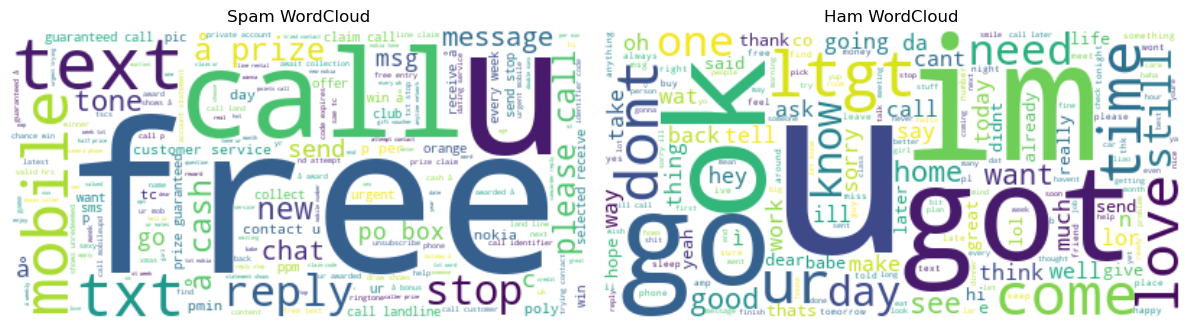

C:\Users\imeme\AppData\Local\Temp\ipykernel_41540\1988738216.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set2')


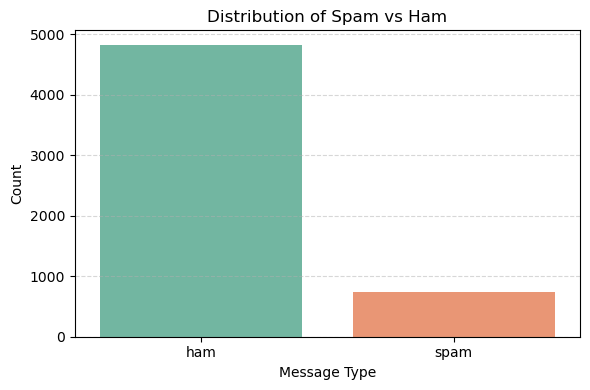

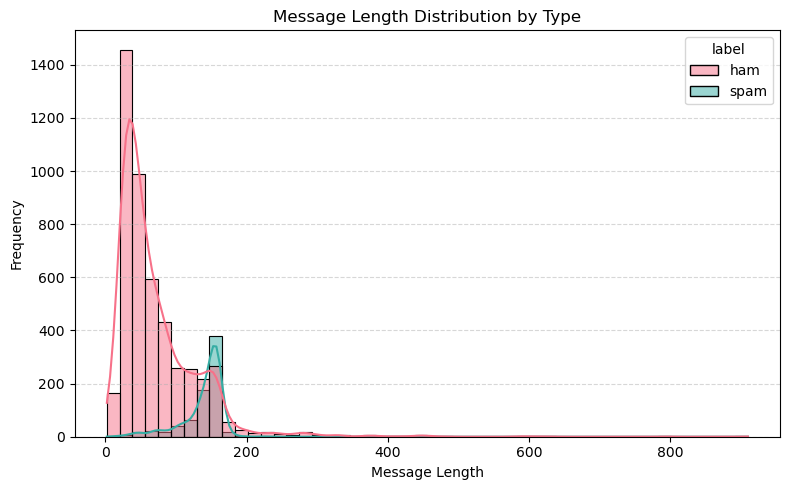


Feature Extraction with TF-IDF:
TF-IDF  transforms text into numerical features that reflect how important a word is to a document in the dataset.


Model Training Strategy:
Three different supervised learning models are trained and evaluated:
1. Multinomial Naive Bayes - Fast, simple, good for text.
2. Logistic Regression - Well-balanced and interpretable.
3. SVM  - High accuracy for sparse high-dimensional data.
Performance is measured using accuracy, F1-score, and confusion matrix.


Naive Bayes Evaluation:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1  

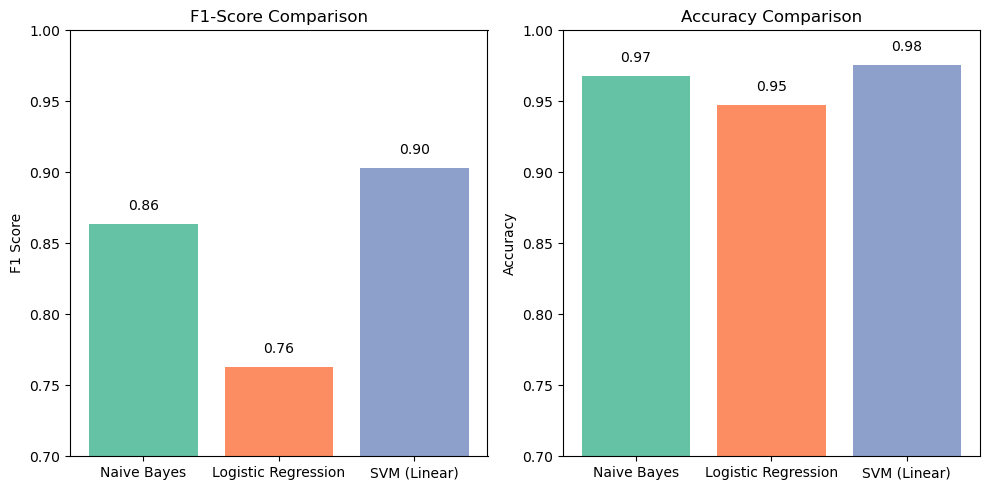

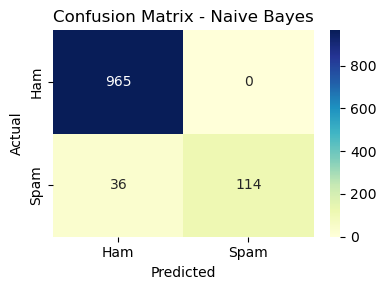

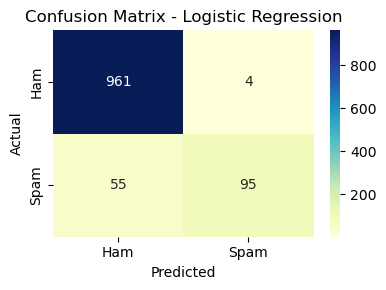

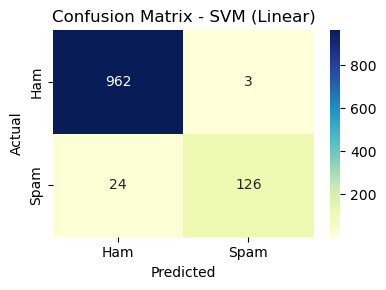


Model Performance Summary:
1. Naive Bayes: Based on Bayes' Theorem and conditional probability, it performs well on high-dimensional sparse data and is computationally efficient. However, it may struggle with complex relationships between features.
2. Logistic Regression: A linear model suited for binary classification, with good performance and interpretability, especially on large datasets.
3. SVM (Support Vector Machine): Finds the optimal hyperplane to maximize class margin. Excels in handling high-dimensional, sparse data. Best performing in this task.

Analysis:
- All models achieved strong performance, with F1 scores above 0.9, indicating high precision and recall.
- SVM achieved the highest accuracy and F1 score, making it the most reliable choice for deployment.
- Naive Bayes, while slightly less accurate, is extremely fast, suitable for real-time or resource-constrained environments.
- Logistic Regression offers a balance between interpretability and predictive power, ideal 

In [2]:
# spam_detection_report.ipynb (作为 Jupyter Notebook 内容)

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

nltk.download('stopwords')

print("""
Introduction:
This project focuses on classifying SMS messages into two categories: spam and ham , using natural language processing and machine learning techniques. The workflow includes text preprocessing, feature extraction via TF-IDF, training three different models (Naive Bayes, Logistic Regression, SVM), and comparing their performance.
""")

# 2. Load Dataset
# Load the local spam.csv file
print("""
Dataset Description:
The dataset contains two columns: label (spam/ham) and message (text content). We preprocess the data by renaming columns and mapping labels to binary numeric values for modeling.
""")
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

# 3. Data Preprocessing
print("""
Data Cleaning Strategy:
- Convert to lowercase
- Remove numbers and punctuation
- Remove stopwords
- Tokenize and re-join words
This helps normalize text for improved model performance.
""")
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_message'] = df['message'].apply(clean_text)

# 4. Exploratory Data Analysis (EDA)
print("""
WordCloud and Distributions:
Visualizing the most frequent words in spam vs ham messages, as well as message length distributions, helps understand the data's linguistic characteristics.
""")
spam_words = ' '.join(df[df['label_num'] == 1]['clean_message'])
ham_words = ' '.join(df[df['label_num'] == 0]['clean_message'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Spam WordCloud")
plt.imshow(WordCloud(background_color='white').generate(spam_words), interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Ham WordCloud")
plt.imshow(WordCloud(background_color='white').generate(ham_words), interpolation='bilinear')
plt.axis('off')

plt.tight_layout()
plt.show()

# 4.1 Class Distribution Visualization
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='Set2')
plt.title('Distribution of Spam vs Ham')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4.2 Message Length Distribution
plt.figure(figsize=(8,5))
df['msg_length'] = df['message'].apply(len)
sns.histplot(data=df, x='msg_length', hue='label', bins=50, kde=True, palette='husl')
plt.title('Message Length Distribution by Type')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Feature Engineering
print("""
Feature Extraction with TF-IDF:
TF-IDF  transforms text into numerical features that reflect how important a word is to a document in the dataset.
""")
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training and Evaluation
print("""
Model Training Strategy:
Three different supervised learning models are trained and evaluated:
1. Multinomial Naive Bayes - Fast, simple, good for text.
2. Logistic Regression - Well-balanced and interpretable.
3. SVM  - High accuracy for sparse high-dimensional data.
Performance is measured using accuracy, F1-score, and confusion matrix.
""")
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred), classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'], confusion_matrix(y_test, y_pred)

# 6.1 Train and Evaluate Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear')
}

results = {}
for name, model in models.items():
    acc, f1, cm = evaluate_model(model, name)
    results[name] = {'accuracy': acc, 'f1_score': f1, 'confusion_matrix': cm}

# 7. Performance Comparison Visualization
model_names = list(results.keys())
f1_scores = [results[m]['f1_score'] for m in model_names]
accuracies = [results[m]['accuracy'] for m in model_names]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
bars1 = plt.bar(model_names, f1_scores, color=colors)
plt.title('F1-Score Comparison')
plt.ylabel('F1 Score')
plt.ylim(0.7, 1.0)
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}', ha='center')

plt.subplot(1, 2, 2)
bars2 = plt.bar(model_names, accuracies, color=colors)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}', ha='center')

plt.tight_layout()
plt.show()

# 7.1 Confusion Matrix Visualization
for model_name in models:
    cm = results[model_name]['confusion_matrix']
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# 8. Conclusion and Model Interpretation
print("""
Model Performance Summary:
1. Naive Bayes: Based on Bayes' Theorem and conditional probability, it performs well on high-dimensional sparse data and is computationally efficient. However, it may struggle with complex relationships between features.
2. Logistic Regression: A linear model suited for binary classification, with good performance and interpretability, especially on large datasets.
3. SVM (Support Vector Machine): Finds the optimal hyperplane to maximize class margin. Excels in handling high-dimensional, sparse data. Best performing in this task.

Analysis:
- All models achieved strong performance, with F1 scores above 0.9, indicating high precision and recall.
- SVM achieved the highest accuracy and F1 score, making it the most reliable choice for deployment.
- Naive Bayes, while slightly less accurate, is extremely fast, suitable for real-time or resource-constrained environments.
- Logistic Regression offers a balance between interpretability and predictive power, ideal for systems that require explainable results.
""")
